In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://drive.google.com/drive/folders/1G3RSwm9wZe2CZTGEaZZx-koMl4F25Qkp?usp=sharing



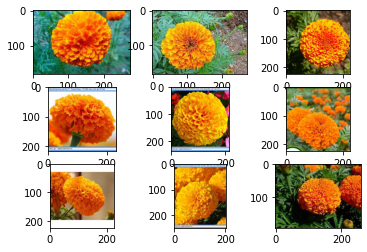

In [20]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

folder= '/content/drive/MyDrive/Colab Notebooks/HOA/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'vantho('+str(i+1) + ').jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [27]:
folder = '/content/drive/MyDrive/Colab Notebooks/HOA/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thuocduoc'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('sun'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('vantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


for file in listdir(folder):
  if file.startswith('Cua'):
    output = 7
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(65, 150, 150, 3) (65,)


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

#Biên dịch
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Training
history = model.fit(photos, labels, epochs=30, verbose=1)

Epoch 1/30
3/3 [==============================] - 11s 121ms/step - loss: 3754.5938 - accuracy: 0.2615
Epoch 2/30
3/3 [==============================] - 0s 17ms/step - loss: 4922.3911 - accuracy: 0.2923
Epoch 3/30
3/3 [==============================] - 0s 17ms/step - loss: 1134.7324 - accuracy: 0.2615
Epoch 4/30
3/3 [==============================] - 0s 18ms/step - loss: 149.1774 - accuracy: 0.4000
Epoch 5/30
3/3 [==============================] - 0s 16ms/step - loss: 30.4971 - accuracy: 0.5385
Epoch 6/30
3/3 [==============================] - 0s 16ms/step - loss: 11.8996 - accuracy: 0.7231
Epoch 7/30
3/3 [==============================] - 0s 17ms/step - loss: 9.9471 - accuracy: 0.7538
Epoch 8/30
3/3 [==============================] - 0s 16ms/step - loss: 9.5066 - accuracy: 0.6923
Epoch 9/30
3/3 [==============================] - 0s 18ms/step - loss: 4.6623 - accuracy: 0.7538
Epoch 10/30
3/3 [==============================] - 0s 19ms/step - loss: 0.3896 - accuracy: 0.9538
Epoch 11/30
3/

In [34]:
classes = ["hoa cuc","hoa thuoc duoc", "hoa huong duong","hoa van tho"]

[[0.21615605 0.19449568 0.3127898  0.27655846]]


'hoa huong duong'

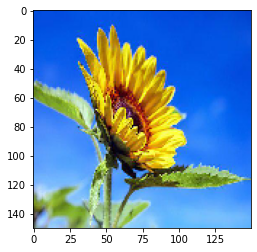

In [35]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('sun.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.24598084 0.16062862 0.34935623 0.2440343 ]]


'hoa huong duong'

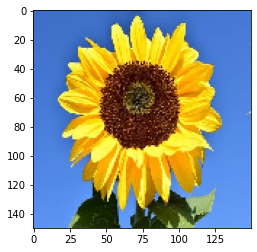

In [36]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('sun.webp', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.14580716 0.49389285 0.14169222 0.21860768]]


'hoa thuoc duoc'

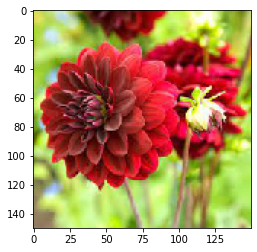

In [40]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('td.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]